# Studi Kasus: Membandingkan Binary Search vs Linear Search

## Pendahuluan
Dalam dunia retail yang sangat kompetitif, menganalisis data besar secara cepat dan efisien adalah kebutuhan utama untuk pengambilan keputusan bisnis. Dataset **"Retail Analysis on Large Dataset"** dari Kaggle menyediakan data yang kaya akan informasi seperti transaksi penjualan, inventaris, kategori produk, dan pola perilaku pelanggan. 

Tugas utama sering kali melibatkan pencarian data tertentu, misalnya:
- Menemukan produk dengan ID tertentu.
- Mencari transaksi berdasarkan waktu atau wilayah.
- Menemukan data pelanggan dengan atribut tertentu.

Untuk melakukan pencarian ini, kita perlu menggunakan algoritma yang tepat. Dua algoritma pencarian yang paling umum adalah **Binary Search** dan **Linear Search**. Memahami perbedaan kinerja keduanya sangat penting karena dapat memengaruhi waktu pemrosesan secara signifikan, terutama pada dataset yang sangat besar.

---

## Mengapa Membandingkan Binary Search dan Linear Search?

### 1. Skalabilitas pada Data Besar
Dataset besar seperti "Retail Analysis on Large Dataset" terdiri dari jutaan baris data. Sebuah algoritma yang tidak efisien dapat mengakibatkan waktu pemrosesan yang lama. Binary Search menawarkan efisiensi yang lebih tinggi dibandingkan Linear Search pada data yang terurut, tetapi perlu pembuktian dalam konteks dataset nyata.

### 2. Sifat Dataset
- **Linear Search**: Tidak memerlukan data dalam urutan tertentu dan bekerja dengan menyisir elemen satu per satu. Kompleksitas waktu: **O(n)**.
- **Binary Search**: Membutuhkan data yang terurut dan mencari dengan cara membagi dataset menjadi dua secara rekursif. Kompleksitas waktu: **O(log n)**.

### 3. Efisiensi Operasional
- Pencarian cepat pada dataset besar seperti "Retail Analysis" dapat membantu mempercepat analisis dan pengambilan keputusan.
- Studi ini akan menunjukkan bagaimana algoritma pencarian dapat memengaruhi efisiensi aplikasi retail berbasis data, seperti sistem inventaris atau pencarian pelanggan.

### 4. Relevansi Praktis
Dalam aplikasi dunia nyata, sering kali kita dihadapkan pada skenario di mana dataset:
- **Tidak terurut** (Linear Search relevan).
- **Telah terurut** (Binary Search optimal).

Membandingkan kedua algoritma akan membantu memahami kapan dan bagaimana masing-masing algoritma harus digunakan.

---

## Objektif Studi
- **Kuantitatif**: Mengukur waktu eksekusi kedua algoritma untuk mencari elemen tertentu pada dataset "Retail Analysis on Large Dataset".
- **Kualitatif**: Menganalisis kesesuaian masing-masing algoritma dengan kondisi dataset, seperti apakah dataset terurut atau tidak.

---

## Desain Eksperimen

### 1. Persiapan Dataset
- Gunakan dataset **"Retail Analysis on Large Dataset"**.
- Pilih kolom yang relevan untuk pencarian, misalnya *Product ID* atau *Transaction ID*.

### 2. Implementasi Algoritma
- **Linear Search**: Cari elemen target dengan memeriksa setiap elemen dari awal hingga akhir.
- **Binary Search**: Pastikan data terurut terlebih dahulu (sort dataset), lalu implementasikan pencarian dengan pembagian interval.

### 3. Parameter yang Diukur
- Waktu eksekusi (runtime) untuk pencarian pada berbagai ukuran dataset.
- Akurasi hasil pencarian.
- Efek pengurutan data terhadap performa Binary Search.

---

## Kesimpulan yang Diharapkan
- **Linear Search** cocok untuk dataset kecil atau tidak terurut, tetapi tidak efisien untuk data besar.
- **Binary Search** menunjukkan performa jauh lebih baik pada dataset terurut, terutama untuk skenario data besar.
- Studi ini dapat membantu merekomendasikan strategi pencarian yang optimal sesuai kondisi dataset di dunia nyata.

---

## 1. Import Libraries and dataset

In [19]:
import time
import matplotlib.pyplot as plt
import random
import pandas as pd

Time Measurement function

In [20]:
def measure_time(search_func, data, target):
    start_time = time.time()
    search_func(data, target)
    end_time = time.time()
    return (end_time - start_time) * 1_000_000

Dataset

In [22]:
df = pd.read_csv('data.csv')
df = df.head(2000)

df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,1000007,18598.0,Tara Espinoza,Dustin71@gmail.com,1.717408e+09,8666 Blackburn Mountains Suite 323,New York,North Carolina,27543.0,USA,...,4049.113700,Grocery,Nestle,Coffee,Good,Same-Day,Cash,Shipped,4.0,Cappuccino
1,1000043,91680.0,Kyle Anderson,Denise18@gmail.com,4.213456e+09,156 Torres Parks,Fort Worth,New Mexico,14461.0,USA,...,2856.747531,Electronics,Apple,Smartphone,Excellent,Same-Day,PayPal,Delivered,4.0,OnePlus
2,1000073,15173.0,David Perkins,Barry89@gmail.com,5.004165e+09,92800 Alisha Station,Portsmouth,England,6081.0,UK,...,3024.821306,Books,Random House,Non-Fiction,Bad,Same-Day,Credit Card,Processing,1.0,Cooking
3,1000088,94779.0,Patricia Mitchell,Crystal52@gmail.com,4.996904e+09,88009 Hendrix Mission,Saskatoon,Ontario,98017.0,Canada,...,1394.639572,Clothing,Zara,Jeans,Average,Standard,Debit Card,Delivered,2.0,Flare jeans
4,1000154,28177.0,David Pratt,Jennifer94@gmail.com,8.616139e+09,52260 Hart Green Suite 689,Ottawa,Ontario,80917.0,Canada,...,4213.747626,Electronics,Samsung,Smartphone,Excellent,Express,Cash,Processing,4.0,LG G


In [23]:
# jumlah dataset
print(f'Dataset memiliki {len(df)} baris.')

Dataset memiliki 2000 baris.


## 2. Algoritma Iteratif
### 2.1. Algoritma Sequential Search

In [24]:
def sequential_search_iterative(data, target):
    for i in range(len(data)):
        if data[i] == target:
            return i
    return -1

### 2.2. Algoritma Binary Search

In [25]:
def binary_search_iterative(data, target):
    left, right = 0, len(data) - 1
    while left <= right:
        mid = (left + right) // 2
        if data[mid] == target:
            return mid
        elif data[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

## 2.3 Eksperimen Algoritma Iteratif

**Eksperimen ketika mencari Transaction_ID yang bernilai tertinggi**:

Waktu Sequential Search untuk nilai 1058636: 248.67 mikrodetik
Waktu Binary Search untuk nilai 1058636: 6.68 mikrodetik


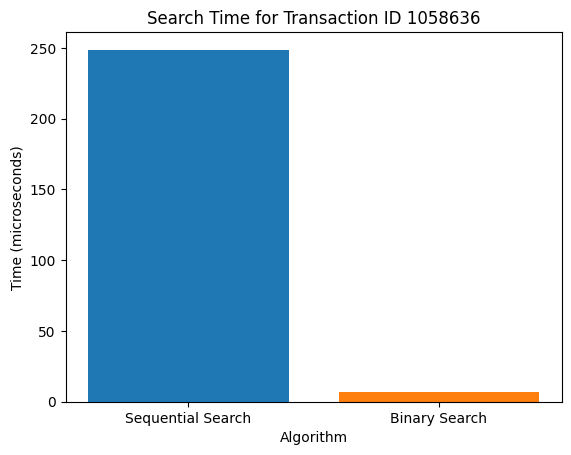

In [49]:
# Temukan nilai tertinggi di kolom Transaction_ID
max_transaction_id = df['Transaction_ID'].max()

# Konversi kolom Transaction_ID menjadi list
transaction_list = df['Transaction_ID'].tolist()

# Ukur waktu pencarian Sequential Search
elapsed_time_seq = measure_time(sequential_search_iterative, transaction_list, max_transaction_id)
elapsed_time_bin = measure_time(binary_search_iterative, transaction_list, max_transaction_id)

print(f"Waktu Sequential Search untuk nilai {max_transaction_id}: {elapsed_time_seq:.2f} mikrodetik")
print(f"Waktu Binary Search untuk nilai {max_transaction_id}: {elapsed_time_bin:.2f} mikrodetik")

plt.bar(["Sequential Search"], [elapsed_time_seq])
plt.bar(["Binary Search"], [elapsed_time_bin])
plt.xlabel("Algorithm")
plt.ylabel("Time (microseconds)")
plt.title(f"Search Time for Transaction ID {max_transaction_id}")
plt.show()

Sequential search memiliki kompleksitas waktu **O(n)** karena harus memeriksa setiap elemen dalam daftar satu per satu hingga nilai yang dicari ditemukan, yang menyebabkan waktu eksekusi lebih lama (248.67 mikrodetik). Sebaliknya, binary search memiliki kompleksitas waktu **O(log n)** karena membagi ruang pencarian menjadi dua secara berulang, sehingga jauh lebih cepat (6.68 mikrodetik) pada dataset yang sama. Performa binary search lebih unggul, terutama pada dataset besar, namun algoritma ini memerlukan data yang sudah terurut untuk bekerja secara optimal.

**Eksperimen lainnya**:

Saat kita mencari `Transaksi_ID`: [1000007, 1005757, 1015857, 1030875, 1042329, 1054002, 1058510]

Case 1: Transaction_ID=1000007, Sequential Search=4.05 us, Binary Search=7.39 us
Case 2: Transaction_ID=1005757, Sequential Search=14.54 us, Binary Search=3.10 us
Case 3: Transaction_ID=1015857, Sequential Search=39.10 us, Binary Search=4.29 us
Case 4: Transaction_ID=1030875, Sequential Search=68.90 us, Binary Search=3.10 us
Case 5: Transaction_ID=1042329, Sequential Search=93.46 us, Binary Search=3.10 us
Case 6: Transaction_ID=1054002, Sequential Search=117.30 us, Binary Search=3.34 us
Case 7: Transaction_ID=1058510, Sequential Search=130.18 us, Binary Search=3.10 us


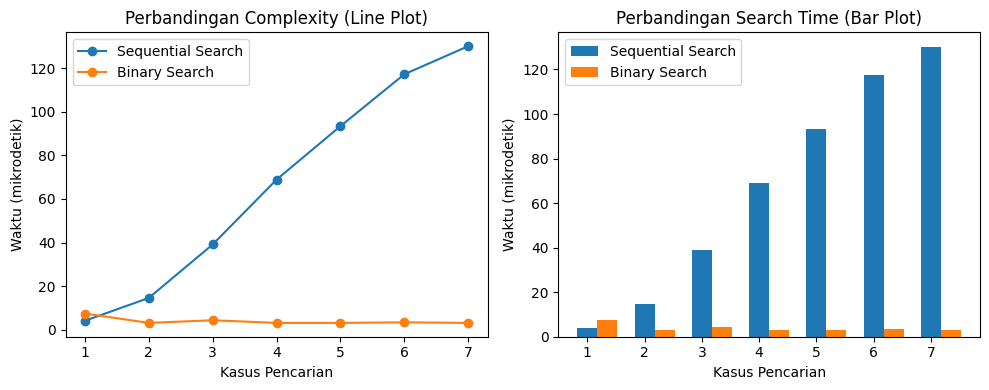

In [46]:
cases = [1000007, 1005757, 1015857, 1030875, 1042329, 1054002, 1058510]

time_seq_list = []
time_bin_list = []

# Lakukan pencarian untuk setiap kasus
for t in cases:
    seq_time = measure_time(sequential_search_iterative, transaction_list, t)
    bin_time = measure_time(binary_search_iterative, transaction_list, t)
    time_seq_list.append(seq_time)
    time_bin_list.append(bin_time)

# Cetak waktu pencarian untuk setiap kasus
for i, val in enumerate(cases, start=1):
    print(f"Case {i}: Transaction_ID={val}, Sequential Search={time_seq_list[i-1]:.2f} us, Binary Search={time_bin_list[i-1]:.2f} us")

# Line plot untuk membandingkan kompleksitas
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 8), time_seq_list, marker='o', label='Sequential Search')
plt.plot(range(1, 8), time_bin_list, marker='o', label='Binary Search')
plt.xlabel('Kasus Pencarian')
plt.ylabel('Waktu (mikrodetik)')
plt.title('Perbandingan Complexity (Line Plot)')
plt.legend()

# Bar plot untuk waktu pencarian
plt.subplot(1, 2, 2)
x = range(1, 8)
plt.bar(x, time_seq_list, width=0.35, label='Sequential Search')
plt.bar([i + 0.35 for i in x], time_bin_list, width=0.35, label='Binary Search')
plt.xlabel('Kasus Pencarian')
plt.ylabel('Waktu (mikrodetik)')
plt.title('Perbandingan Search Time (Bar Plot)')
plt.legend()
plt.tight_layout()
plt.show()

Binary search menunjukkan performa yang konsisten dengan waktu rata-rata sekitar 3.5 mikrodetik dalam semua kasus, yang mencerminkan efisiensi logaritmiknya. Sebaliknya, sequential search memiliki waktu yang meningkat secara linier seiring dengan meningkatnya posisi data yang dicari, dari 4.05 mikrodetik (Case 1) hingga 130.18 mikrodetik (Case 7).

Data ini menegaskan bahwa sequential search tidak efisien untuk dataset besar karena kompleksitasnya O(n), sementara binary search tetap cepat dengan kompleksitas O(log n), meskipun membutuhkan data yang telah diurutkan.

## 3. Algoritma Rekursif
### 3.1 Algoritma Sequential Search

In [54]:
def sequential_search_recursive(data, target, index=0):
    # Base case: if index is out of range, the target is not in the list
    if index >= len(data):
        return -1
    if data[index] == target:
        return index
    return sequential_search_recursive(data, target, index + 1)

### 3.2 Algoritma Binary Search

In [75]:
def binary_search_recursive(data, target, left=0, right=None):
    if right is None:
        right = len(data) - 1

    # Base case: if left index exceeds right, the target is not in the list
    if left > right:
        return -1

    mid = (left + right) // 2

    if data[mid] == target:
        return mid
    elif target < data[mid]:
        return binary_search_recursive(data, target, left, mid - 1)
    else:
        return binary_search_recursive(data, target, mid + 1, right)

### 2.3 Eksperimen Algoritma Rekursif

**Eksperimen ketika mencari Transaction_ID yang bernilai tertinggi**:

Waktu Sequential Search untuk nilai 1058636: 1009.94 mikrodetik
Waktu Binary Search untuk nilai 1058636: 12.64 mikrodetik


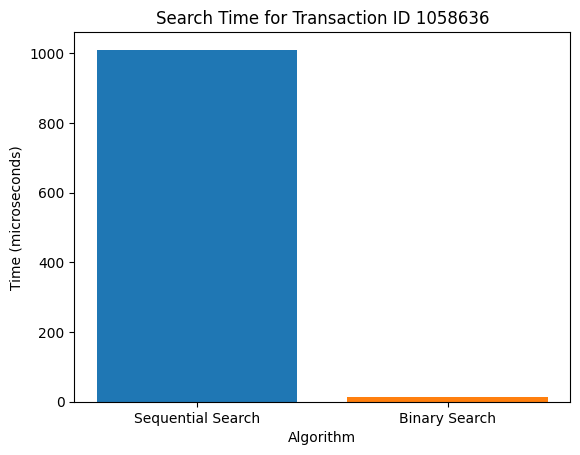

In [77]:
# Temukan nilai tertinggi di kolom Transaction_ID
max_transaction_id = df['Transaction_ID'].max()

# Konversi kolom Transaction_ID menjadi list
transaction_list = df['Transaction_ID'].tolist()

# Ukur waktu pencarian Sequential Search
elapsed_time_seq = measure_time(sequential_search_recursive, transaction_list, max_transaction_id)
elapsed_time_bin = measure_time(binary_search_recursive, transaction_list, max_transaction_id)

print(f"Waktu Sequential Search untuk nilai {max_transaction_id}: {elapsed_time_seq:.2f} mikrodetik")
print(f"Waktu Binary Search untuk nilai {max_transaction_id}: {elapsed_time_bin:.2f} mikrodetik")

plt.bar(["Sequential Search"], [elapsed_time_seq])
plt.bar(["Binary Search"], [elapsed_time_bin])
plt.xlabel("Algorithm")
plt.ylabel("Time (microseconds)")
plt.title(f"Search Time for Transaction ID {max_transaction_id}")
plt.show()

Sequential search membutuhkan waktu 1009.94 mikrodetik dengan kompleksitas **O(n)**, karena harus memeriksa elemen satu per satu secara rekursif hingga menemukan target, yang membuatnya lambat pada dataset besar.

Sebaliknya, binary search hanya membutuhkan waktu 12.64 mikrodetik dengan kompleksitas **O(log n)**, karena membagi ruang pencarian menjadi dua pada setiap langkah, sehingga jauh lebih efisien. Hasil ini menunjukkan bahwa binary search lebih unggul dalam efisiensi waktu, asalkan data telah diurutkan.

**Eksperimen lainnya**:

Saat kita mencari `Transaksi_ID`: [1000007, 1005757, 1015857, 1030875, 1042329, 1054002, 1058510]

Case 1: Transaction_ID=1000007, Sequential Search=3.34 us, Binary Search=15.02 us
Case 2: Transaction_ID=1005757, Sequential Search=140.43 us, Binary Search=9.78 us
Case 3: Transaction_ID=1015857, Sequential Search=285.39 us, Binary Search=8.58 us
Case 4: Transaction_ID=1030875, Sequential Search=303.98 us, Binary Search=5.96 us
Case 5: Transaction_ID=1042329, Sequential Search=467.54 us, Binary Search=6.20 us
Case 6: Transaction_ID=1054002, Sequential Search=501.87 us, Binary Search=5.72 us
Case 7: Transaction_ID=1058510, Sequential Search=619.65 us, Binary Search=6.68 us


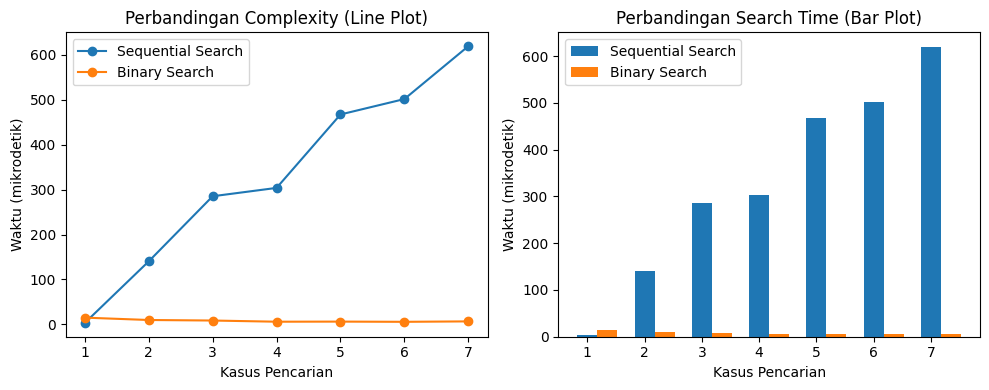

In [164]:
cases = [1000007, 1005757, 1015857, 1030875, 1042329, 1054002, 1058510]

time_seq_list = []
time_bin_list = []

# Lakukan pencarian untuk setiap kasus
for t in cases:
    seq_time = measure_time(sequential_search_recursive, transaction_list, t)
    bin_time = measure_time(binary_search_recursive, transaction_list, t)
    time_seq_list.append(seq_time)
    time_bin_list.append(bin_time)

# Cetak waktu pencarian untuk setiap kasus
for i, val in enumerate(cases, start=1):
    print(f"Case {i}: Transaction_ID={val}, Sequential Search={time_seq_list[i-1]:.2f} us, Binary Search={time_bin_list[i-1]:.2f} us")

# Line plot untuk membandingkan kompleksitas
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 8), time_seq_list, marker='o', label='Sequential Search')
plt.plot(range(1, 8), time_bin_list, marker='o', label='Binary Search')
plt.xlabel('Kasus Pencarian')
plt.ylabel('Waktu (mikrodetik)')
plt.title('Perbandingan Complexity (Line Plot)')
plt.legend()

# Bar plot untuk waktu pencarian
plt.subplot(1, 2, 2)
x = range(1, 8)
plt.bar(x, time_seq_list, width=0.35, label='Sequential Search')
plt.bar([i + 0.35 for i in x], time_bin_list, width=0.35, label='Binary Search')
plt.xlabel('Kasus Pencarian')
plt.ylabel('Waktu (mikrodetik)')
plt.title('Perbandingan Search Time (Bar Plot)')
plt.legend()
plt.tight_layout()
plt.show()

Sequential search memiliki waktu pencarian yang meningkat secara linier, dari 3.34 mikrodetik pada kasus pertama hingga 619.65 mikrodetik pada kasus ketujuh, mencerminkan kompleksitas **O(n)**. Sebaliknya, binary search memiliki waktu pencarian yang konsisten, berkisar antara 5.72 hingga 15.02 mikrodetik, dengan kompleksitas **O(log n)**. Hal ini menunjukkan bahwa sequential search menjadi semakin lambat seiring bertambahnya ukuran dataset, sementara binary search tetap efisien terlepas dari ukuran data.

Grafik menunjukkan bahwa binary search secara signifikan lebih cepat dibandingkan sequential search, terutama pada kasus pencarian data yang terletak di posisi akhir dalam dataset besar. Performa binary search tetap konsisten karena memanfaatkan data yang terurut dan pembagian ruang pencarian yang efisien, membuatnya pilihan terbaik untuk dataset besar yang sering diakses.

## 4. Perbandingan Rekursif dengan Iteratif

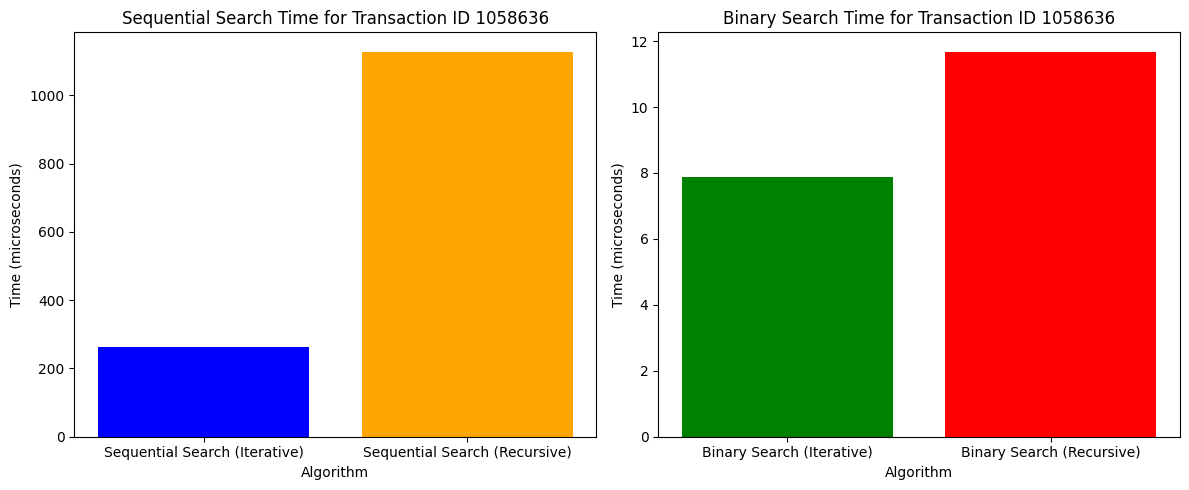

In [198]:
# Temukan nilai tertinggi di kolom Transaction_ID
max_transaction_id = df['Transaction_ID'].max()

# Konversi kolom Transaction_ID menjadi list
transaction_list = df['Transaction_ID'].tolist()

# Ukur waktu pencarian Sequential Search
elapsed_time_seq_it = measure_time(sequential_search_iterative, transaction_list, max_transaction_id)
elapsed_time_seq_rec = measure_time(sequential_search_recursive, transaction_list, max_transaction_id)

# Ukur waktu pencarian Binary Search
elapsed_time_bin_it = measure_time(binary_search_iterative, transaction_list, max_transaction_id)
elapsed_time_bin_rec = measure_time(binary_search_recursive, transaction_list, max_transaction_id)

# Plot data dalam satu figure dengan subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Sequential Search
axes[0].bar(["Sequential Search (Iterative)", "Sequential Search (Recursive)"],
            [elapsed_time_seq_it, elapsed_time_seq_rec], color=['blue', 'orange'])
axes[0].set_xlabel("Algorithm")
axes[0].set_ylabel("Time (microseconds)")
axes[0].set_title(f"Sequential Search Time for Transaction ID {max_transaction_id}")

# Subplot 2: Binary Search
axes[1].bar(["Binary Search (Iterative)", "Binary Search (Recursive)"],
            [elapsed_time_bin_it, elapsed_time_bin_rec], color=['green', 'red'])
axes[1].set_xlabel("Algorithm")
axes[1].set_ylabel("Time (microseconds)")
axes[1].set_title(f"Binary Search Time for Transaction ID {max_transaction_id}")

# Adjust layout
plt.tight_layout()
plt.show()

Pada grafik terlihat bahwa **Sequential Search Recursive** membutuhkan waktu lebih lama (sekitar 1000+ mikrodetik) dibandingkan **Sequential Search Iterative** (sekitar 250 mikrodetik). Ini karena metode rekursif memiliki tambahan waktu untuk memanggil fungsi berulang kali, sedangkan metode iteratif lebih sederhana dan langsung.

Untuk **Binary Search**, baik metode iteratif maupun rekursif memiliki waktu yang hampir sama (sekitar 7–12 mikrodetik) dan tetap sangat cepat. Namun, metode iteratif sedikit lebih efisien karena tidak memerlukan overhead untuk pemanggilan fungsi berulang seperti pada metode rekursif. Secara keseluruhan, metode iteratif lebih disarankan untuk pencarian yang cepat dan efisien.

### 4.1 Eksperimen
Kita akan bereksperimen jika kita mencari `Transaction_ID`: [1000007, 1005757, 1015857, 1030875, 1042329, 1054002, 1058510] pada algoritma Sequential Search & Binary Search (Iteratif & Rekursif)

Case 1: Transaction_ID=1000007, Sequential Search=2.38 us, Binary Search=11.44 us
Case 2: Transaction_ID=1005757, Sequential Search=1111.51 us, Binary Search=14.54 us
Case 3: Transaction_ID=1015857, Sequential Search=495.43 us, Binary Search=12.16 us
Case 4: Transaction_ID=1030875, Sequential Search=331.88 us, Binary Search=6.20 us
Case 5: Transaction_ID=1042329, Sequential Search=423.19 us, Binary Search=6.44 us
Case 6: Transaction_ID=1054002, Sequential Search=794.17 us, Binary Search=8.34 us
Case 7: Transaction_ID=1058510, Sequential Search=588.66 us, Binary Search=6.44 us


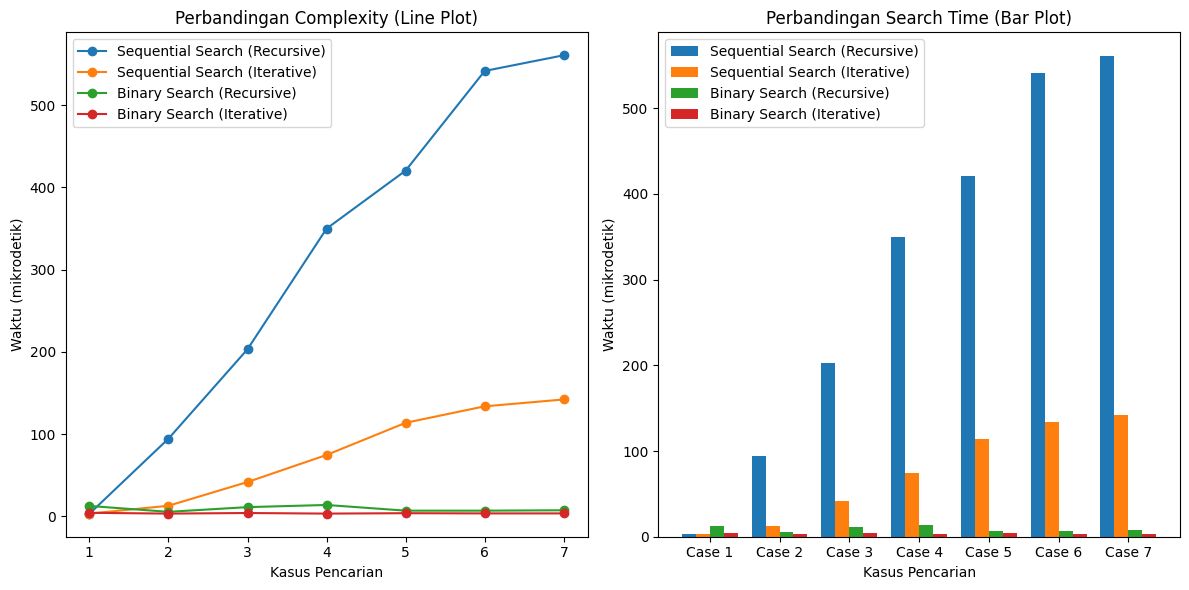

In [202]:
cases = [1000007, 1005757, 1015857, 1030875, 1042329, 1054002, 1058510]

time_seq_list_rec = []
time_bin_list_rec = []

time_seq_list_it = []
time_bin_list_it = []

# Lakukan pencarian untuk setiap kasus
for t in cases:
    seq_time_rec = measure_time(sequential_search_recursive, transaction_list, t)
    bin_time_rec = measure_time(binary_search_recursive, transaction_list, t)

    seq_time_it = measure_time(sequential_search_iterative, transaction_list, t)
    bin_time_it = measure_time(binary_search_iterative, transaction_list, t)
    time_seq_list_rec.append(seq_time_rec)
    time_seq_list_it.append(seq_time_it)
    
    time_bin_list_rec.append(bin_time_rec)
    time_bin_list_it.append(bin_time_it)
    

# Cetak waktu pencarian untuk setiap kasus
for i, val in enumerate(cases, start=1):
    print(f"Case {i}: Transaction_ID={val}, Sequential Search={time_seq_list[i-1]:.2f} us, Binary Search={time_bin_list[i-1]:.2f} us")

# Line plot untuk membandingkan kompleksitas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 8), time_seq_list_rec, marker='o', label='Sequential Search (Recursive)')
plt.plot(range(1, 8), time_seq_list_it, marker='o', label='Sequential Search (Iterative)')

plt.plot(range(1, 8), time_bin_list_rec, marker='o', label='Binary Search (Recursive)')
plt.plot(range(1, 8), time_bin_list_it, marker='o', label='Binary Search (Iterative)')

plt.xlabel('Kasus Pencarian')
plt.ylabel('Waktu (mikrodetik)')
plt.title('Perbandingan Complexity (Line Plot)')
plt.legend()

# Bar plot untuk waktu pencarian
plt.subplot(1, 2, 2)
bar_width = 0.2
x = range(1, len(cases) + 1)

plt.bar([i - 1.5 * bar_width for i in x], time_seq_list_rec, width=bar_width, label='Sequential Search (Recursive)')
plt.bar([i - 0.5 * bar_width for i in x], time_seq_list_it, width=bar_width, label='Sequential Search (Iterative)')
plt.bar([i + 0.5 * bar_width for i in x], time_bin_list_rec, width=bar_width, label='Binary Search (Recursive)')
plt.bar([i + 1.5 * bar_width for i in x], time_bin_list_it, width=bar_width, label='Binary Search (Iterative)')

plt.xlabel('Kasus Pencarian')
plt.xticks(x, [f'Case {i}' for i in x])
plt.ylabel('Waktu (mikrodetik)')
plt.title('Perbandingan Search Time (Bar Plot)')
plt.legend()

plt.tight_layout()
plt.show()

Grafik menunjukkan bahwa **Sequential Search** memiliki waktu pencarian yang cenderung lebih lama dibandingkan **Binary Search**, terutama saat dataset menjadi besar. Waktu Sequential Search meningkat secara bertahap karena algoritma ini harus memeriksa elemen satu per satu, sedangkan Binary Search lebih konsisten dan tetap cepat karena membagi dataset menjadi dua bagian di setiap langkah.

Secara umum, **Binary Search** jauh lebih efisien dibandingkan Sequential Search, terutama untuk dataset yang sudah terurut. Sequential Search lebih sederhana tetapi kurang cocok untuk data besar, sementara Binary Search menjadi pilihan terbaik karena waktu pencariannya yang stabil dan lebih cepat.

**Catatan dalam pengujian semua eksperimen**:
- Program bahasa Python
- Alat, Laptop MSI GF66 Intel Core i5 